### Import data

In [1]:
using Pkg
Pkg.instantiate()
using DrugResponseModel

# import data from the path
conc_l, pop, g2, g1, g2_0, g1_0 = setup_data("lapatinib"); # in which:
# pop: population data
# g1, g2: g1 and g2 data
# initial: initial number of cells in g1 and in g2 at time 0

┌ Info: Precompiling DrugResponseModel [f46a7e40-ab32-11e9-0ff4-0323d592fbfd]
└ @ Base loading.jl:1273


[270.6160849082357, 480.3759203965525, 966.966694614829, 786.905138355963, 836.4551992041862, 178.80803027017754, 120.75175559972031, 108.31795623042201]
[0.04328832134563738 0.03648162270983955 2.8648017017256917 0.24081373574714626 0.36283166570911285 0.39139970457380246 0.10810062088568115 0.03450320732462295; 0.023744005639845554 2.013218849946711 2.9999999999999525 1.1375791031907 2.320391585178082 2.4881852256424115 2.996781486866457 2.317262686857611; 1.1188887645456189e-10 1.4102355248937015e-16 0.002052485345902549 2.061352265526889e-17 2.5013580173284084e-17 1.0302882080867309e-17 0.009688602149776458 0.010295069485189825; 1.8025935160517766e-9 4.5270996428067365e-17 0.014504620028424552 0.0038431472296162404 0.008707696515933547 0.00877543625714241 0.0017868784557677198 3.588778052000755e-5; 0.6762447256414617 0.6189912382845747 0.4864500152400519 0.4468895339911219 0.4508790184816335 0.48802703498742117 0.5846771662793676 0.5816136133096413; 1.8714987481511385 1.85861019998

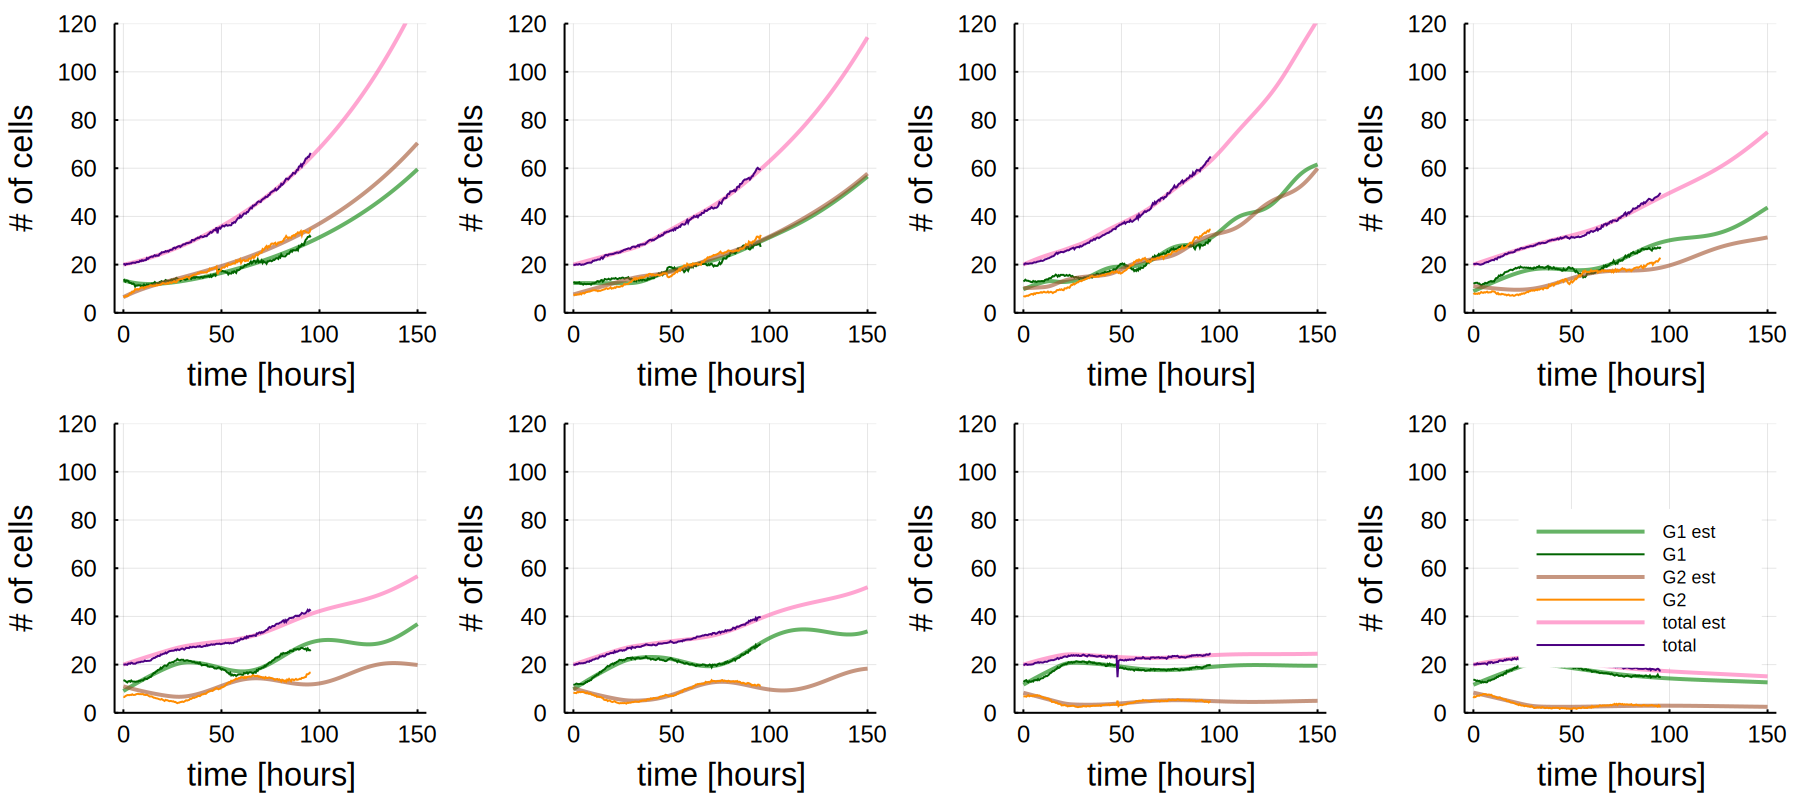

In [2]:
params_ode = zeros(7, 8)
cost = zeros(8)
for i in 1:8
    cost[i], params_ode[:, i] = ODEoptimizer(i, g1, g2, g1_0, g2_0)
end

println(cost)
println(params_ode)
# plotting the fitted curves
ODEplot_all(params_ode, g1, g2, g1_0, g2_0, pop)